In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl

Reading the data

In [10]:
df=pd.read_csv("FuelConsumption.csv")

In [14]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
df['ENGINESIZE'].head

<bound method NDFrame.head of 0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64>

In [166]:
cdf = df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]

In [22]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,6.7,8.5
1,2.4,4,7.7,9.6
2,1.5,4,5.8,5.9
3,3.5,6,9.1,11.1
4,3.5,6,8.7,10.6


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>]],
      dtype=object)

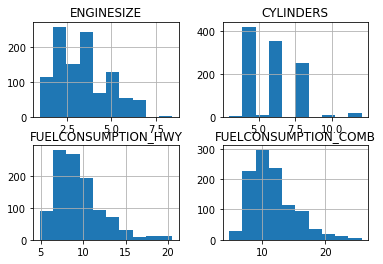

In [29]:
viz= cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
viz.hist()

Text(0, 0.5, 'FUELCONSUMPTION_HWY')

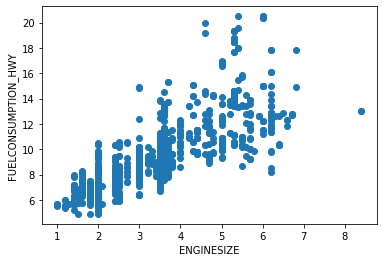

In [31]:
plt.scatter(viz['ENGINESIZE'],viz['FUELCONSUMPTION_HWY'])
plt.xlabel('ENGINESIZE')
plt.ylabel('FUELCONSUMPTION_HWY')

(array([[541., 462.,  64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  4., 429., 608.,   9.,  17.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  44., 403., 368., 142.,  75.,  17.,  18.,   0.,   0.],
        [  0.,   9., 179., 348., 264., 132.,  88.,  20.,  22.,   5.]]),
 array([ 1.  ,  3.48,  5.96,  8.44, 10.92, 13.4 , 15.88, 18.36, 20.84,
        23.32, 25.8 ]),
 <a list of 4 BarContainer objects>)

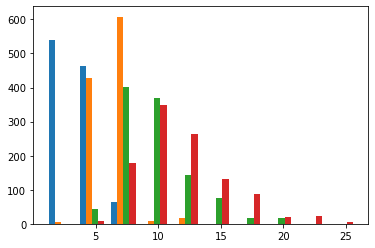

In [32]:
plt.hist(viz)

In [81]:
msk=np.random.rand(len(cdf))<0.8
msk

array([False,  True,  True, ..., False, False,  True])

In [167]:
train= cdf[msk]
test=cdf[~msk]
test

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,196,6.7,8.5
3,3.5,6,255,9.1,11.1
11,3.5,6,239,8.3,10.4
21,2.0,4,214,7.5,9.3
28,3.0,6,258,8.8,11.2
...,...,...,...,...,...
1053,2.0,4,246,9.4,10.7
1055,3.0,6,281,8.0,10.4
1063,3.2,6,264,9.5,11.5
1064,3.0,6,271,9.8,11.8


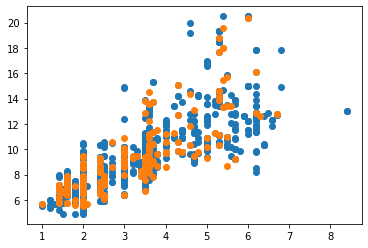

In [96]:
plt.scatter(train.ENGINESIZE, train.FUELCONSUMPTION_HWY)
plt.scatter(test.ENGINESIZE, test.FUELCONSUMPTION_HWY)

In [86]:
import sklearn as sk

In [87]:
from sklearn import linear_model

# Univariate Linear Regression

In [98]:
reg = linear_model.LinearRegression()
train_x=np.asanyarray(train.ENGINESIZE).reshape(-1, 1)
train_y=np.asanyarray(train.FUELCONSUMPTION_HWY).reshape(-1, 1)
reg.fit(train_x,train_y)

LinearRegression()

In [102]:
reg.coef_


array([[1.50612962]])

In [101]:
reg.intercept_

array([4.41670429])

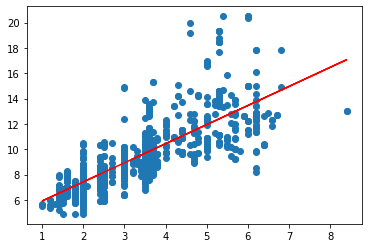

In [105]:
plt.scatter(train.ENGINESIZE, train.FUELCONSUMPTION_HWY)
plt.plot(train_x,train_x*reg.coef_+reg.intercept_,'r')

In [113]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test.ENGINESIZE).reshape(-1, 1)
test_y=np.asanyarray(test.FUELCONSUMPTION_HWY).reshape(-1, 1)
test_y_=reg.predict(test_x)
r2_score(test_y,test_y_)

0.6131012193964317

# Multiple Regression 

In [127]:
reg = linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE','FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['FUELCONSUMPTION_HWY']])
reg.fit(train_x,train_y)

LinearRegression()

In [128]:
reg.coef_

array([[-0.17262239,  0.84611278]])

In [129]:
reg.intercept_

array([0.25151076])

In [130]:
test_x=np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['FUELCONSUMPTION_HWY']])
test_y_=reg.predict(test_x)
r2_score(test_y,test_y_)

0.9751306442463586

# Ploynomial Regression

In [241]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x=np.asanyarray(train.ENGINESIZE).reshape(-1, 1)
train_y=np.asanyarray(train.CO2EMISSIONS).reshape(-1, 1)

poly = PolynomialFeatures(degree=2) # it generates a new dataset with coefficients for x**0, x**1 and x**2 
train_x_poly=poly.fit_transform(train_x)

In [242]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)

In [243]:
clf.coef_

array([[ 0.        , 52.00286476, -1.71964092]])

In [244]:
clf.intercept_

array([105.14604116])

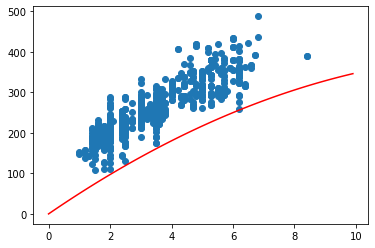

In [245]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
xx=np.arange(0,10,0.1)
yy=clf.coef_[0][0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*xx**2
plt.plot(xx,yy,'r')

In [246]:
test_x=np.asanyarray(test.ENGINESIZE).reshape(-1, 1)
test_y=np.asanyarray(test.CO2EMISSIONS).reshape(-1, 1)

poly = PolynomialFeatures(degree=2) # it generates a new dataset with coefficients for x**0, x**1 and x**2
test_x_poly=poly.fit_transform(test_x)
test_y_=clf.predict(test_x_poly)
r2_score(test_y,test_y_)

0.7555100467867917

# Non-linear regression

In [247]:
from scipy.optimize import curve_fit

In [248]:
def sigmoid(x,theta1,theta2):
    y = 1 / ( 1 + np.exp(-theta1*(x-theta2)))
    return y

In [260]:
train_x=np.asanyarray(train.ENGINESIZE)
train_x=train_x/max(train_x)

train_y=np.asanyarray(train.CO2EMISSIONS)
train_y=train_y/max(train_y)

popt, pcov = curve_fit(sigmoid,train_x,train_y)

In [250]:
pcov

array([[3.38520269e-03, 3.21129086e-05],
       [3.21129086e-05, 1.05395566e-05]])

In [262]:
popt

array([2.84714953, 0.35860714])

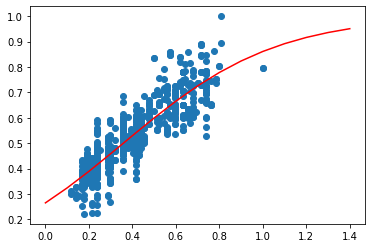

In [273]:
plt.scatter(train_x, train_y)
x=np.arange(0,1.5,0.1)
y = 1 / ( 1 + np.exp(-popt[0]*(x-popt[1])))
plt.plot(x,y,'r')